In [40]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

In [60]:
Q_target = np.zeros((10, 2))
Q_target[0, 0] = 1
Q_target[9, 1] = 1

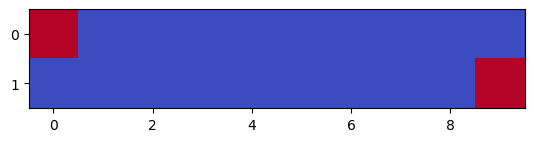

In [61]:
plt.imshow(Q_target.T, cmap='coolwarm', vmin = 0, vmax=1)
plt.show()

In [62]:
def objective(Q):
    return np.sum((Q-Q_target)**2)

def objective_grad(Q):
    return 2 * (Q - Q_target)

In [111]:
Q = np.zeros((10, 2))
Q[9, 0] = 1
Q[0, 1] = 1
print(objective(Q))

lr = 0.25
S = np.zeros((U.shape[1], Vh.shape[0]))
d = min(U.shape[1], Vh.shape[0])
S[:d, :d] = np.eye(d)
for i in range(10000):
    M = deepcopy(Q - lr * objective_grad(Q))
    U, s, Vh = np.linalg.svd(M)
    Q = deepcopy(U @ S @ Vh)
objective(Q)

4.0


0.0

In [110]:
Q

array([[-1.79380389e-16,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.21168839e-16]])

In [158]:
# import autograd.numpy as np
# from autograd import jacobian


def parametrize_orthogonal_matrix(x):
    """
    Takes a vector of size n*(n-1)/2 as input and returns an n x n orthogonal matrix.
    """
    n = int(0.5 + np.sqrt(0.5 + 2 * len(x)))
    A = np.zeros((n, n))
    k = 0
    for i in range(n):
        for j in range(i):
            A[i, j] = x[k]
            A[j, i] = -x[k]
            k += 1
    diag = np.sqrt(np.sum(A ** 2, axis=1))
    Q = A / diag[:, np.newaxis]
    return Q

# Define a test vector of parameters
x_test = np.random.randn(6)
print(x_test)
Q = parametrize_orthogonal_matrix(x_test)
# dQdx = jacobian(parametrize_orthogonal_matrix)(x_test)

# print("Orthogonal matrix:\n", Q)
# print("Derivative with respect to parameters:\n", dQdx)


[-0.83213702  1.06743037  1.39706937  0.65018417 -0.68349797 -0.96113315]


In [159]:
Q @ Q.T

array([[ 1.        ,  0.39525778,  0.17869586,  0.22608426],
       [ 0.39525778,  1.        , -0.06544606,  0.337494  ],
       [ 0.17869586, -0.06544606,  1.        , -0.09667123],
       [ 0.22608426,  0.337494  , -0.09667123,  1.        ]])

In [182]:
def householder_reflector(v):
    """
    Computes the Householder reflector matrix for a given vector v.
    """
    u = v / np.linalg.norm(v)
    H = np.eye(len(v)) - 2 * np.outer(u, u)
    return H

def parametrize_tall_skinny_matrix(n, k, x):
    """
    Takes n, k, and a vector of size k*(n-k) as input and returns a unique n x k tall skinny orthogonal matrix.
    """
    Q = np.eye(n)
    C = np.zeros((n, k))
    k_idx = 0
    for i in range(k):
        v = np.zeros(n - i)
        v[0] = 1
        if i < k - 1:
            v[1:] = x[k_idx:k_idx + n - i-1]
            k_idx += n - i - 1
        H = np.eye(n)
        H[i:, i:] = householder_reflector(v)
        Q = Q @ H
        C[:, i] = Q[:, i]
    return C

# Define a test vector of parameters
n = 5
k = 3
x_test = np.array([0.1, 0.2, -0.3, 0.4, -0.5, 0.6])
M = parametrize_tall_skinny_matrix(n, k, x_test)

ValueError: could not broadcast input array from shape (2,) into shape (3,)

In [175]:
M

array([[-0.69794413,  0.46329322,  0.49062049],
       [ 0.22772951, -0.26697373,  0.75644996],
       [-0.36265694, -0.1224063 , -0.0263829 ],
       [ 0.56758523,  0.67341309,  0.22756053],
       [ 0.08567501, -0.49559654,  0.36687212]])

In [1]:
import os

In [10]:
folders_all = os.listdir(os.path.join("../", "../", "rnn_coach", "data", "trained_RNNs", "CDDM"))
folders_filtered = []
for folder in folders_all:
    if "N=100;lmbdr=0.0;lmbdo=0.3" in folder:
        folders_filtered.append(folder)

In [13]:
folders_filtered

['CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0064612_20230403-160226',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0070679_20230403-201401',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0068963_20230403-202147',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0072453_20230403-201333',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0068146_20230403-175313',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0068341_20230403-201853',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0066462_20230403-215733',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0066983_20230403-220143',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0069985_20230403-220506',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0066581_20230403-202327',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0068383_20230403-160527',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.008884_20230403-215042',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0067739_20230403-161144',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0070495_20230403-161145',
 'CDDM_relu;N=100;lmbdr=0.0;lmbdo=0.3_0.0066119_20230403-160411',
 'CDDM_relu